In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import plotly.express as px
import cufflinks as cf
df = pd.read_excel("Complete-dataset-Corné,Justin.xlsx")

### Over dit document
In dit document wordt een CRISP-DM cycles doorlopen, welke vervolgens een dataproduct (visualisaties) op zal leveren. Tot slot wordt er een conclusie getrokken en advies gegeven.

### Business understanding
Het ziekenhuis Isala wil de zorg voor diabetespatiënten verbeteren. Het gaat hier specifiek om het behandelproces door onnauwkeurigheden in metingen te filteren en hierop te baseren of een behandelplan aangepast moet worden of niet. Visualisaties zullen helpen bij het verkrijgen van inzicht van diverse meetmethoden om vervolgens conclusies te kunnen trekken. Die zijn er nog niet.

Voor een als er een voorspelling wordt gemaakt:

Daarbij zou een visualisatie van een voorspelling meer inzicht brengen in hoe de total error mogelijk zal veranderen per jaar. Dit zou kunnen resulteren in toekomstige plannen voor het standaardiseren van de HbA1c meetmethoden.

Het idee achter deze card is dat we een visualisatie krijgen over het verschil tussen de laatste sample gemiddelde en de eerste sample gemiddelde per Manufacturer van 2020 en 2021.
Hierdoor krijgt Erna een idee over welke merken het over het algemeen goed doen en welke minder. Dit is interresant om te weten omdat je dan de methoden vanuit een helecopter view bekijkt inplaats van per methode.

### Data understanding
Welke databronnen zijn gegeven en in welk formaat: Een excel bestand genaamd: Complete-dataset-FINAL.xlsx

note
Het excel bestand dat gebruikt gaat worden, is het resultaat van rapporten die om zijn gezet naar excel. Dit is de meest recente versie waarin de meetmethoden zijn genormaliseerd en de waarden dubbelgecheckt zijn.

Hoe groot zijn deze databronnen: 355 kB

-4685 rijen

-12 kolommen

Kolomnamen: Method name, N (no. labs), Mean, Bias, CV, Sample, Reference value, Year, Source, Type, Manufacturer (fabrikant).

### Data preperation

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4688 entries, 0 to 4687
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Method name          4684 non-null   object 
 1   N (no. labs)         4684 non-null   object 
 2   Mean                 4602 non-null   float64
 3   Bias                 4058 non-null   float64
 4   CV                   4584 non-null   float64
 5   Sample               4684 non-null   object 
 6   Reference Value      4656 non-null   float64
 7   Year                 4684 non-null   float64
 8   Source (CAP/EurA1c)  4684 non-null   object 
 9   Type (Fresh/frozen)  4684 non-null   object 
 10  Manufacturer         4684 non-null   object 
 11  Total Error          4688 non-null   float64
dtypes: float64(6), object(6)
memory usage: 439.6+ KB


In [3]:
df.describe()

,Mean,Bias,CV,Reference Value,Year,Total Error
count,4602.000000,4058.000000,4584.000000,4656.000000,4684.000000,4688.000000
mean,7.388795,0.073361,2.972033,7.361971,2015.568531,5.759460
std,1.896549,0.650975,1.420669,1.864492,4.261448,2.978506
min,4.600000,-6.900000,0.500000,4.920000,2006.000000,0.000000
25%,5.780000,-0.090000,2.100000,5.800000,2013.000000,3.976000
50%,7.100000,0.020000,2.700000,7.100000,2017.000000,5.194000
75%,8.700000,0.130000,3.500000,8.650000,2019.000000,6.795500
max,19.200000,6.500000,17.100000,13.000000,2021.000000,28.216000


In [4]:
df.tail()

,Method name,N (no. labs),Mean,Bias,CV,Sample,Reference Value,Year,Source (CAP/EurA1c),Type (Fresh/frozen),Manufacturer,Total Error
4683,Vitros 5.1 FS/4600/5600/XT7600 Chem. Systems,199,10.15,0.03,3.2,GH5-15,10.12,2021.0,CAP,Fresh,Vitros,6.302
4684,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000
4685,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000
4686,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000
4687,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000


In [5]:
df.head(50)

,Method name,N (no. labs),Mean,Bias,CV,Sample,Reference Value,Year,Source (CAP/EurA1c),Type (Fresh/frozen),Manufacturer,Total Error
0,A1cNOW,19,7.96,-0.54,5.5,GH2-01,8.50,2011.0,CAP,Fresh,Bayer/Metrika,10.240
1,A1cNOW,28,5.14,-0.46,3.8,GH2-01,5.60,2012.0,CAP,Fresh,Bayer/Metrika,6.988
2,A1cNOW,16,6.37,-0.74,5.3,GH2-01,7.11,2013.0,CAP,Fresh,Bayer,9.648
3,A1cNOW,15,10.40,NaN,8.1,GH2-01,10.70,2006.0,CAP,Fresh,Metrika,15.876
4,A1cNOW,23,5.30,NaN,6.1,GH2-01,5.40,2007.0,CAP,Fresh,Metrika,11.956
5,A1cNOW,19,11.90,NaN,5.6,GH2-01,13.00,2008.0,CAP,Fresh,Metrika,10.976
6,A1cNOW,17,4.60,NaN,5.0,GH2-01,5.10,2009.0,CAP,Fresh,Metrika,9.800
7,A1cNOW,21,5.63,-0.27,5.6,GH2-01,5.90,2010.0,CAP,Fresh,Metrika,10.706
8,A1cNOW,19,5.14,-0.26,4.9,GH2-02,5.40,2011.0,CAP,Fresh,Bayer/Metrika,9.344
9,A1cNOW,28,8.49,-0.91,6.3,GH2-02,9.40,2012.0,CAP,Fresh,Bayer/Metrika,11.438


In [6]:
df = df.drop(columns=['N (no. labs)', 'Source (CAP/EurA1c)', 'Type (Fresh/frozen)'])

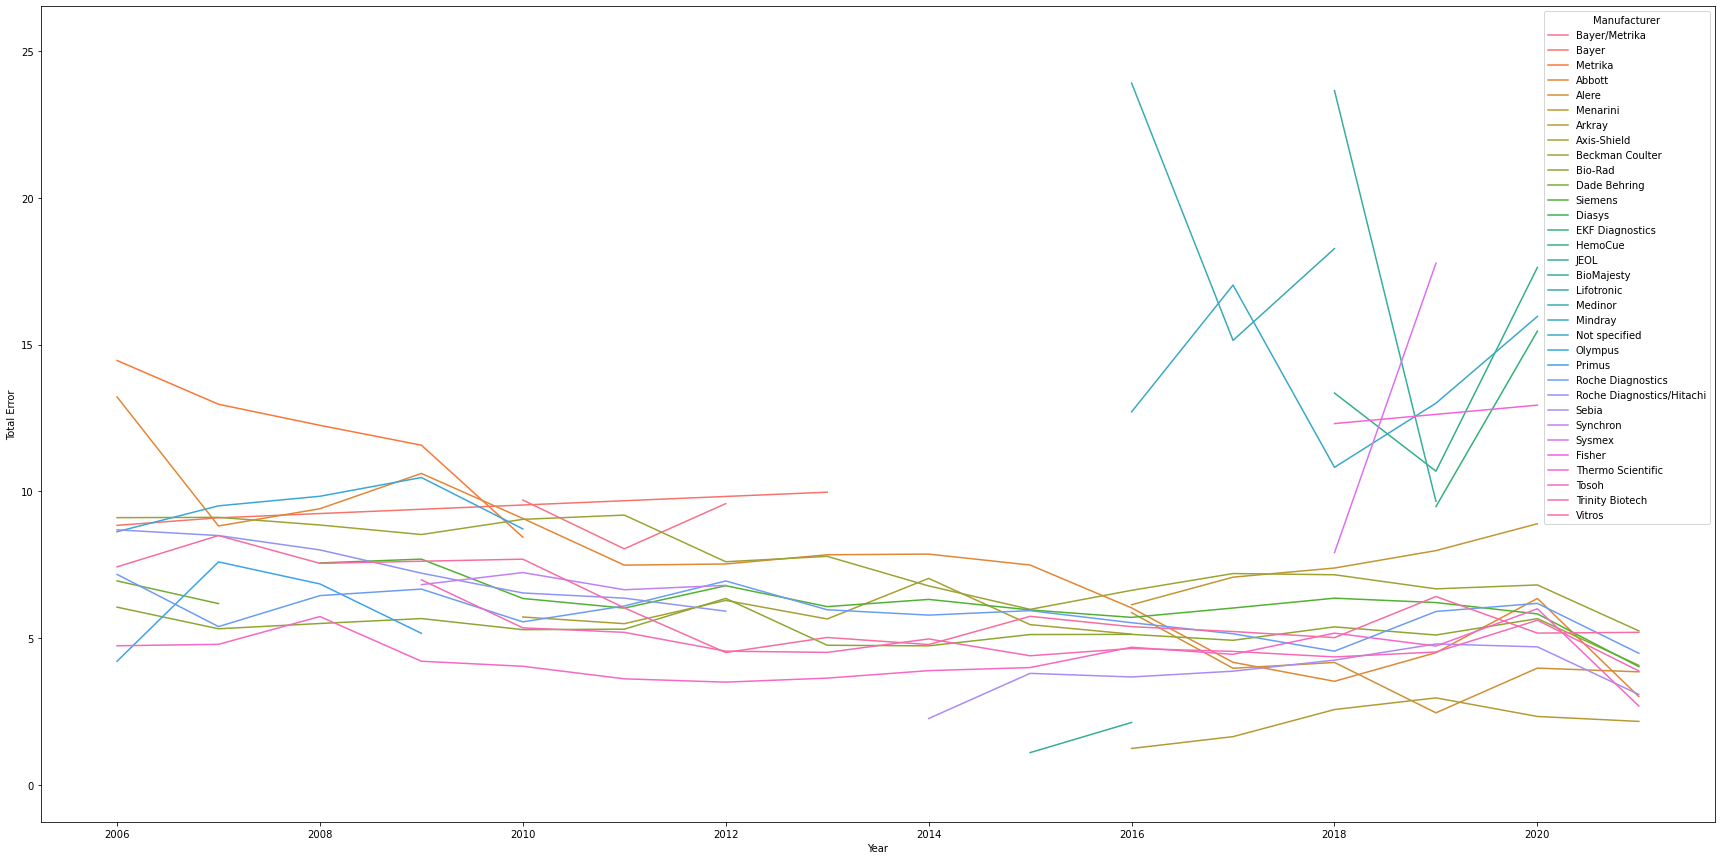

In [7]:
#Alles
sns.lineplot(data=df, x="Year", y="Total Error", hue="Manufacturer", ci=None)
#sns.set(rc={'figure.figsize':(8,6)})
plt.gcf().set_size_inches(30, 15)

In [8]:
#Kleinste total error value per merk
dfmin = df.groupby(['Manufacturer'], sort=True)['Total Error'].min()
dfmin.head(50)

Manufacturer
Abbott                        0.000
Alere                         0.000
Arkray                        0.000
Axis-Shield                   2.604
Bayer                         5.292
Bayer/Metrika                 5.076
Beckman Coulter               0.000
Bio-Rad                       0.000
BioMajesty                    7.524
Dade Behring                  5.488
Diasys                        6.948
EKF Diagnostics               7.180
Fisher                        0.000
HemoCue                       6.728
JEOL                          0.000
Lifotronic                    9.756
Medinor                      13.524
Menarini                      4.580
Metrika                       6.300
Mindray                      24.928
Not specified                 8.104
Olympus                       6.860
Primus                        0.000
Roche Diagnostics             0.000
Roche Diagnostics/Hitachi     3.538
Sebia                         0.880
Siemens                       0.000
Synchron       

In [9]:
#grootste total error value per merk
dfmax = df.groupby(['Manufacturer'], sort=True)['Total Error'].max()
dfmax.head(50)

Manufacturer
Abbott                       22.108
Alere                         7.544
Arkray                        5.564
Axis-Shield                   9.012
Bayer                        15.876
Bayer/Metrika                11.438
Beckman Coulter              18.916
Bio-Rad                      17.844
BioMajesty                   25.352
Dade Behring                  7.252
Diasys                       10.432
EKF Diagnostics              17.272
Fisher                        0.000
HemoCue                      18.424
JEOL                          5.478
Lifotronic                   19.604
Medinor                      28.216
Menarini                     10.296
Metrika                      15.876
Mindray                      25.604
Not specified                23.920
Olympus                      14.308
Primus                       11.760
Roche Diagnostics            23.962
Roche Diagnostics/Hitachi    10.540
Sebia                        12.440
Siemens                      22.660
Synchron       

In [10]:
#Grootste en Kleinste total error value per merk naast elkaar
dfminmax = df.groupby(['Manufacturer'], sort=True).agg({'Total Error': ['min', 'max']})
dfminmax.head(50)

Total Error        
                                  min     max
Manufacturer                                 
Abbott                          0.000  22.108
Alere                           0.000   7.544
Arkray                          0.000   5.564
Axis-Shield                     2.604   9.012
Bayer                           5.292  15.876
Bayer/Metrika                   5.076  11.438
Beckman Coulter                 0.000  18.916
Bio-Rad                         0.000  17.844
BioMajesty                      7.524  25.352
Dade Behring                    5.488   7.252
Diasys                          6.948  10.432
EKF Diagnostics                 7.180  17.272
Fisher                          0.000   0.000
HemoCue                         6.728  18.424
JEOL                            0.000   5.478
Lifotronic                      9.756  19.604
Medinor                        13.524  28.216
Menarini                        4.580  10.296
Metrika                         6.300  15.876
Mindray                        24.928  25.604
Not specified                   8.104  23.920
Olympus                         6.860  14.308
Primus                          0.000  11.760
Roche Diagnostics               0.000  23.962
Roche Diagnostics/Hitachi       3.538  10.540
Sebia                           0.880  12.440
Siemens                         0.000  22.660
Synchron                        5.590   9.136
Sysmex                          7.368  21.280
Thermo Scientific              10.780  13.840
Tosoh                           0.000  16.180
Trinity Biotech                 0.000  13.936
Vitros                          3.292  13.908

In [11]:
#Top 5 grootste
dfmax = dfmax.nlargest(5)

In [12]:
#Top 5 kleinste(beste)
dfmin.nsmallest(5)

Manufacturer
Abbott             0.0
Alere              0.0
Arkray             0.0
Beckman Coulter    0.0
Bio-Rad            0.0
Name: Total Error, dtype: float64

In [13]:
dfMedinor = pd.DataFrame(df.loc[df['Manufacturer'] == "Abbott"])
dfMindray = pd.DataFrame(df.loc[df['Manufacturer'] == "Alere"])
dfBioMajesty = pd.DataFrame(df.loc[df['Manufacturer'] == "Arkray"])
dfNotspecified = pd.DataFrame(df.loc[df['Manufacturer'] == "Beckman Coulter"])
dfRoche = pd.DataFrame(df.loc[df['Manufacturer'] == "Bio-Rad"])
#Totdf.add(df.loc[df['Manufacturer'] == "Mindray"])
#Totdf[df.loc[df['Manufacturer'] == "Mindray"]]

#dfMindray.head(50)
minResult = pd.concat([dfMedinor, dfMindray, dfBioMajesty, dfNotspecified, dfRoche])

minResult.head(50)


,Method name,Mean,Bias,CV,Sample,Reference Value,Year,Manufacturer,Total Error
51,Abbott Alinity,5.26100,-2.50,8.2,Sample 1,5.58125,2020.0,Abbott,13.572
52,Abbott Alinity,5.45315,-0.40,2.1,Sample 1,5.54465,2020.0,Abbott,3.716
53,Abbott Alinity,5.27930,-2.30,8.2,Sample 2,5.58125,2020.0,Abbott,13.772
54,Abbott Alinity,5.45315,-0.40,1.9,Sample 2,5.54465,2020.0,Abbott,3.324
55,Abbott Alinity ci series,8.03000,0.06,1.2,GH5-01,7.97000,2020.0,Abbott,2.412
56,Abbott Alinity ci series,8.93000,0.07,1.2,GH5-01,8.86000,2021.0,Abbott,2.422
57,Abbott Alinity ci series,5.84000,-0.05,1.2,GH5-02,5.89000,2020.0,Abbott,2.302
58,Abbott Alinity ci series,6.77000,-0.07,1.9,GH5-02,6.84000,2021.0,Abbott,3.654
59,Abbott Alinity ci series,5.05000,-0.08,1.4,GH5-03,5.13000,2020.0,Abbott,2.664
60,Abbott Alinity ci series,9.49000,0.10,1.3,GH5-03,9.39000,2021.0,Abbott,2.648


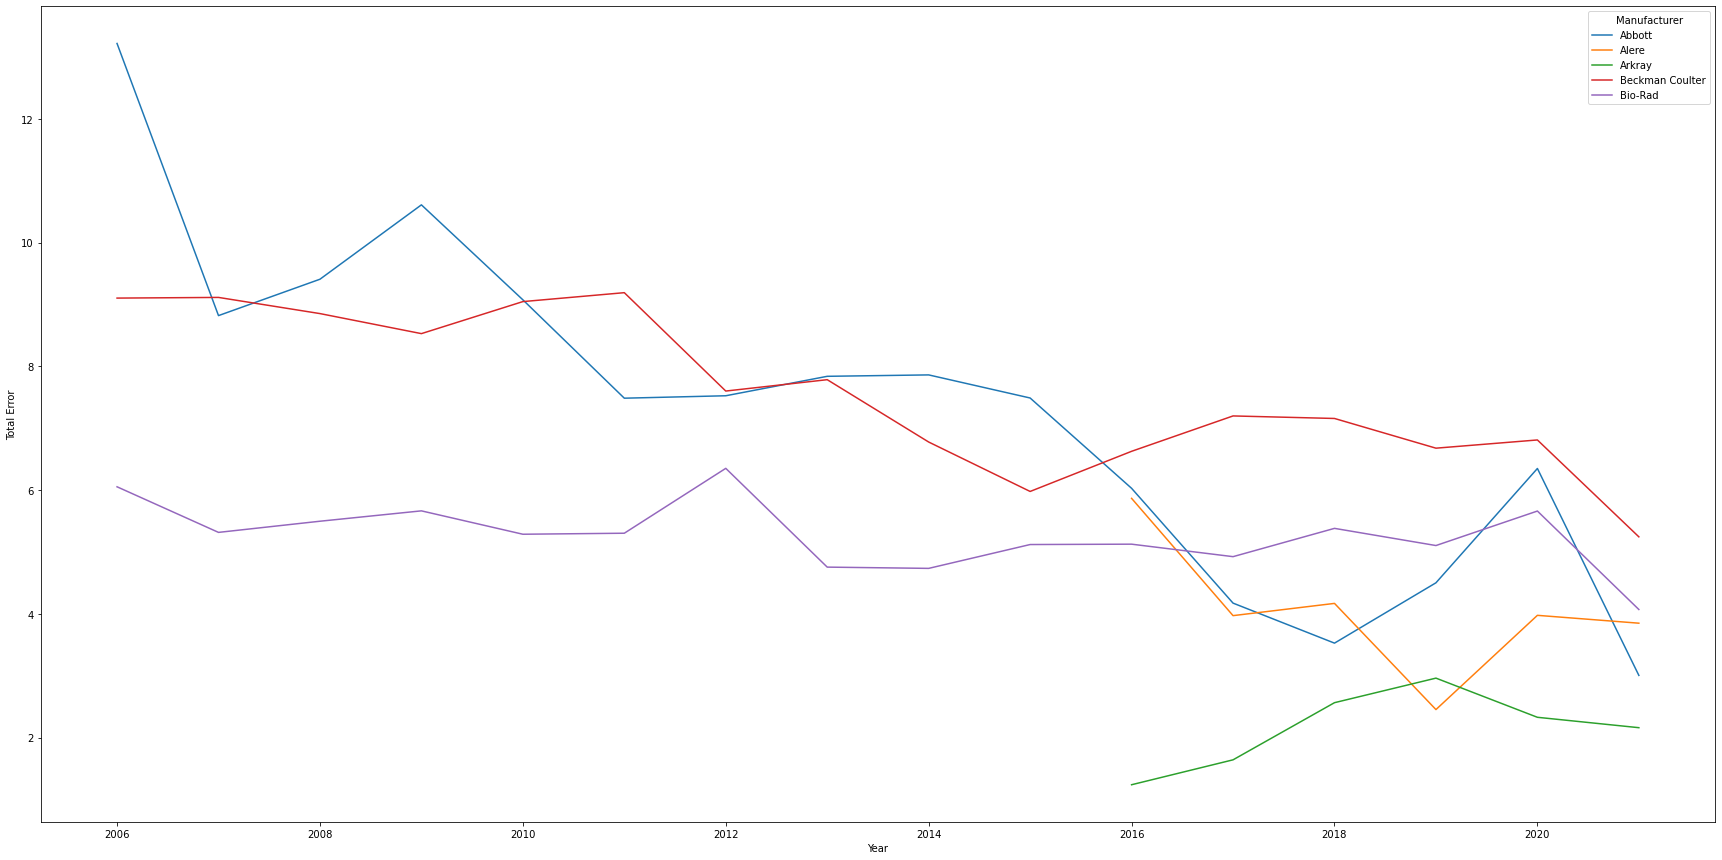

In [14]:
#De top 5 max Total Errors
sns.lineplot(data=minResult, x="Year", y="Total Error", hue="Manufacturer", ci=None)
#sns.set(rc={'figure.figsize':(8,6)})
plt.gcf().set_size_inches(30, 15)

In [15]:
#df2018 = df.loc[df['Year'] == 2018]
#df2019 = df.loc[df['Year'] == 2019]
df2020 = df.loc[df['Year'] == 2020]
df2021 = df.loc[df['Year'] == 2021]

resultbest = pd.concat([df2020, df2021])
resultbest = resultbest.replace({'Sample':{'Sample 1' : 'GH5-01', 'Sample 2' : 'GH5-15' }})

resultbest.head(2000)

,Method name,Mean,Bias,CV,Sample,Reference Value,Year,Manufacturer,Total Error
51,Abbott Alinity,5.26100,-2.50,8.2,GH5-01,5.58125,2020.0,Abbott,13.572
52,Abbott Alinity,5.45315,-0.40,2.1,GH5-01,5.54465,2020.0,Abbott,3.716
53,Abbott Alinity,5.27930,-2.30,8.2,GH5-15,5.58125,2020.0,Abbott,13.772
54,Abbott Alinity,5.45315,-0.40,1.9,GH5-15,5.54465,2020.0,Abbott,3.324
55,Abbott Alinity ci series,8.03000,0.06,1.2,GH5-01,7.97000,2020.0,Abbott,2.412
...,...,...,...,...,...,...,...,...,...
4675,Vitros 5.1 FS/4600/5600/XT7600 Chem. Systems,5.12000,-0.09,1.9,GH5-11,5.21000,2021.0,Vitros,3.634
4677,Vitros 5.1 FS/4600/5600/XT7600 Chem. Systems,6.67000,-0.01,2.4,GH5-12,6.68000,2021.0,Vitros,4.694
4679,Vitros 5.1 FS/4600/5600/XT7600 Chem. Systems,8.22000,NaN,2.6,GH5-13,NaN,2021.0,Vitros,5.096
4681,Vitros 5.1 FS/4600/5600/XT7600 Chem. Systems,5.94000,-0.04,2.1,GH5-14,5.98000,2021.0,Vitros,4.076


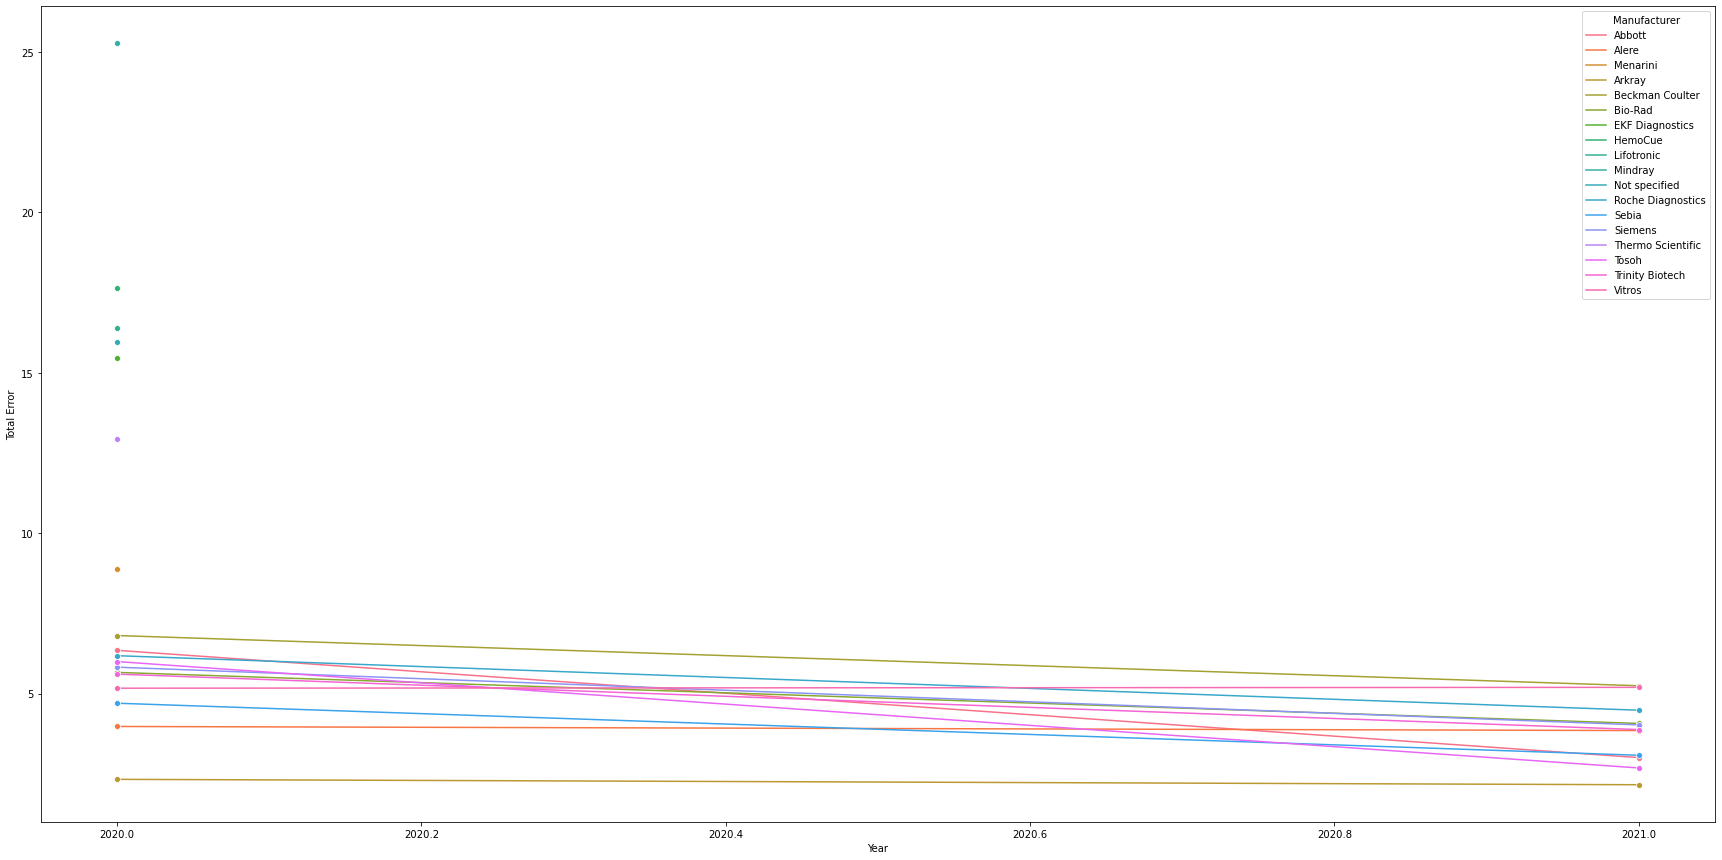

In [16]:
#Max Total Errors
sns.lineplot(data=resultbest, x="Year", y="Total Error", hue="Manufacturer", ci=None, marker='o')
#sns.set(rc={'figure.figsize':(8,6)})
plt.gcf().set_size_inches(30, 15)

In [17]:
resultbest.groupby(['Manufacturer', 'Sample'], sort=True)['Total Error'].mean()

Manufacturer  Sample
Abbott        GH5-01    9.180857
              GH5-02    2.691500
              GH5-03    2.570500
              GH5-04    2.642500
              GH5-05    2.708500
                          ...   
Vitros        GH5-11    3.971000
              GH5-12    5.257000
              GH5-13    4.599000
              GH5-14    4.740000
              GH5-15    5.511000
Name: Total Error, Length: 179, dtype: float64

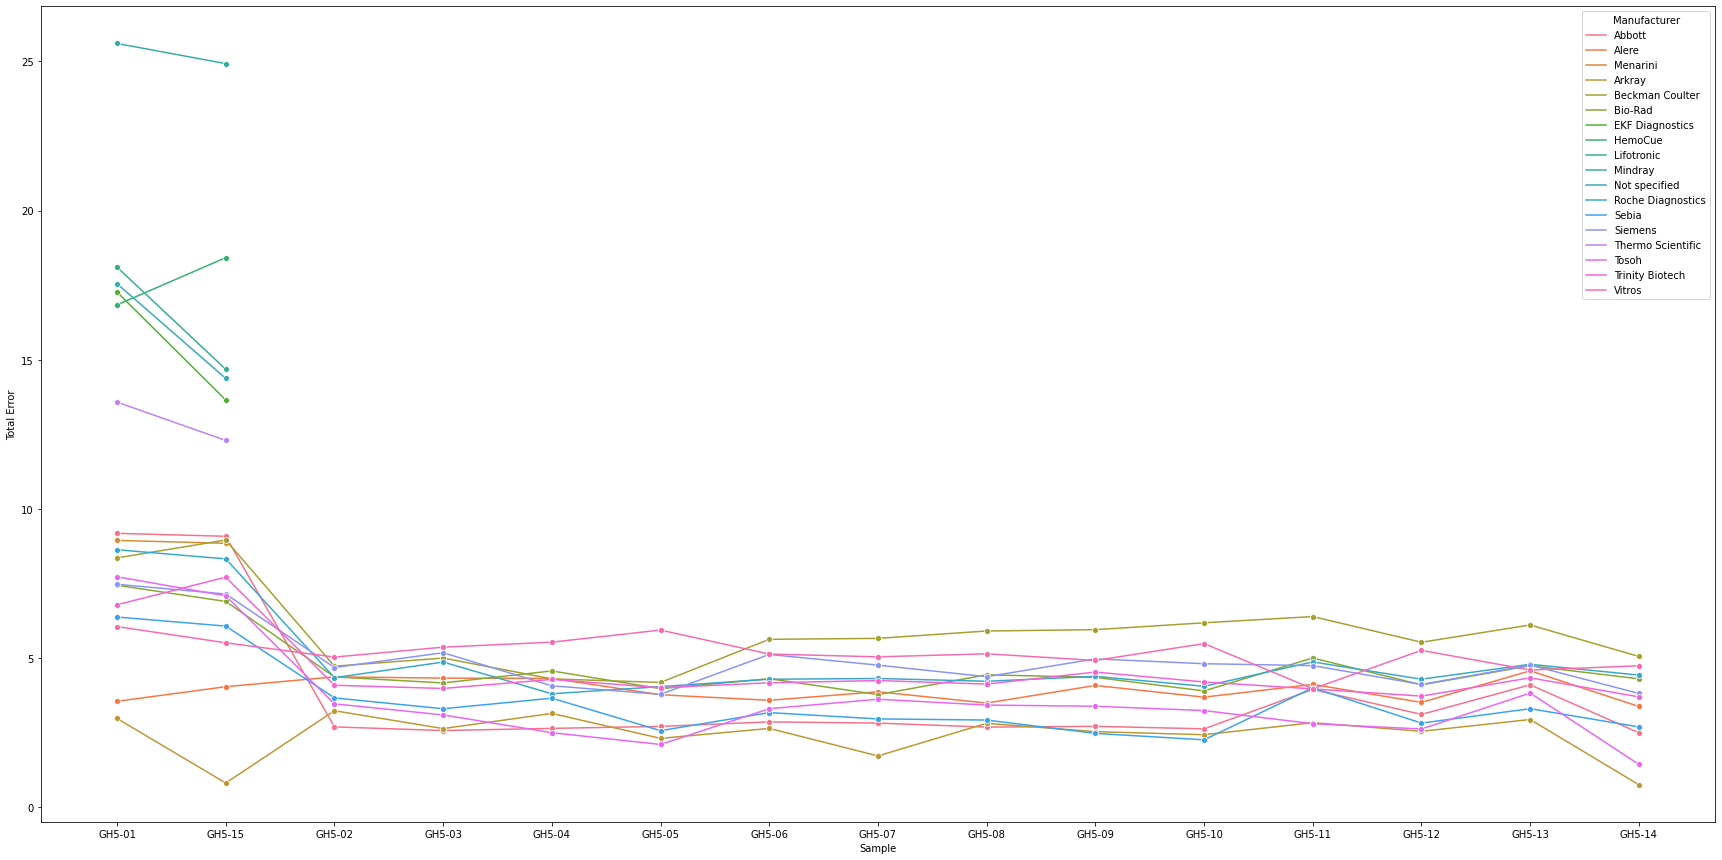

In [18]:
#Max Total Errors met alle samples gemiddeld gepakt
sns.lineplot(data=resultbest, x="Sample", y="Total Error", hue="Manufacturer", ci=None, marker='o')
#sns.set(rc={'figure.figsize':(8,6)})
plt.gcf().set_size_inches(30, 15)

In [19]:
#Dataframe met alle eerste samples van 2020 en alle laatste samples van 2021
eersteValue = resultbest.loc[df['Sample'] == 'GH5-01']
tweedeValue = resultbest.loc[df['Sample'] == 'GH5-15']

endResult = pd.concat([eersteValue, tweedeValue])

endResult.head(200)

,Method name,Mean,Bias,CV,Sample,Reference Value,Year,Manufacturer,Total Error
55,Abbott Alinity ci series,8.03,0.06,1.2,GH5-01,7.97,2020.0,Abbott,2.412
234,Abbott Architect c System,8.10,0.13,1.0,GH5-01,7.97,2020.0,Abbott,2.090
393,Alere Afinion 2,7.85,-0.12,1.9,GH5-01,7.97,2020.0,Alere,3.604
433,Alere Afinion AS100,7.86,-0.11,2.2,GH5-01,7.97,2020.0,Alere,4.202
506,Arkray Adams HA-8180 series,8.03,0.06,1.6,GH5-01,7.97,2020.0,Arkray,3.196
...,...,...,...,...,...,...,...,...,...
3803,Siemens Dimension Vista,9.99,-0.13,1.7,GH5-15,10.12,2021.0,Siemens,3.202
4035,Tosoh G11 Auto HPLC,NaN,NaN,NaN,GH5-15,10.12,2021.0,Tosoh,0.000
4301,Tosoh G8 Auto HPLC,10.26,0.14,1.6,GH5-15,10.12,2021.0,Tosoh,3.276
4519,Trinity Biotech Premier Hb9210 HPLC,10.30,0.18,1.9,GH5-15,10.12,2021.0,Trinity Biotech,3.904


In [20]:
endResult.groupby(['Manufacturer'], sort=True)['Total Error'].mean()
#.mean().diff().nlargest(5)

Manufacturer
Abbott               2.776250
Alere                3.795000
Arkray               1.351250
Beckman Coulter      5.631833
Bio-Rad              4.192750
Roche Diagnostics    4.537500
Sebia                3.185250
Siemens              4.521053
Tosoh                2.161714
Trinity Biotech      3.825500
Vitros               5.783000
Name: Total Error, dtype: float64

In [26]:
endResult.groupby(['Manufacturer'], sort=True)['Total Error'].mean().diff()

Manufacturer
Abbott                    NaN
Alere                1.018750
Arkray              -2.443750
Beckman Coulter      4.280583
Bio-Rad             -1.439083
Roche Diagnostics    0.344750
Sebia               -1.352250
Siemens              1.335803
Tosoh               -2.359338
Trinity Biotech      1.663786
Vitros               1.957500
Name: Total Error, dtype: float64

In [24]:
finish = endResult.groupby(['Manufacturer'], sort=True)['Total Error'].mean().diff()
finish = finish.sort_values()

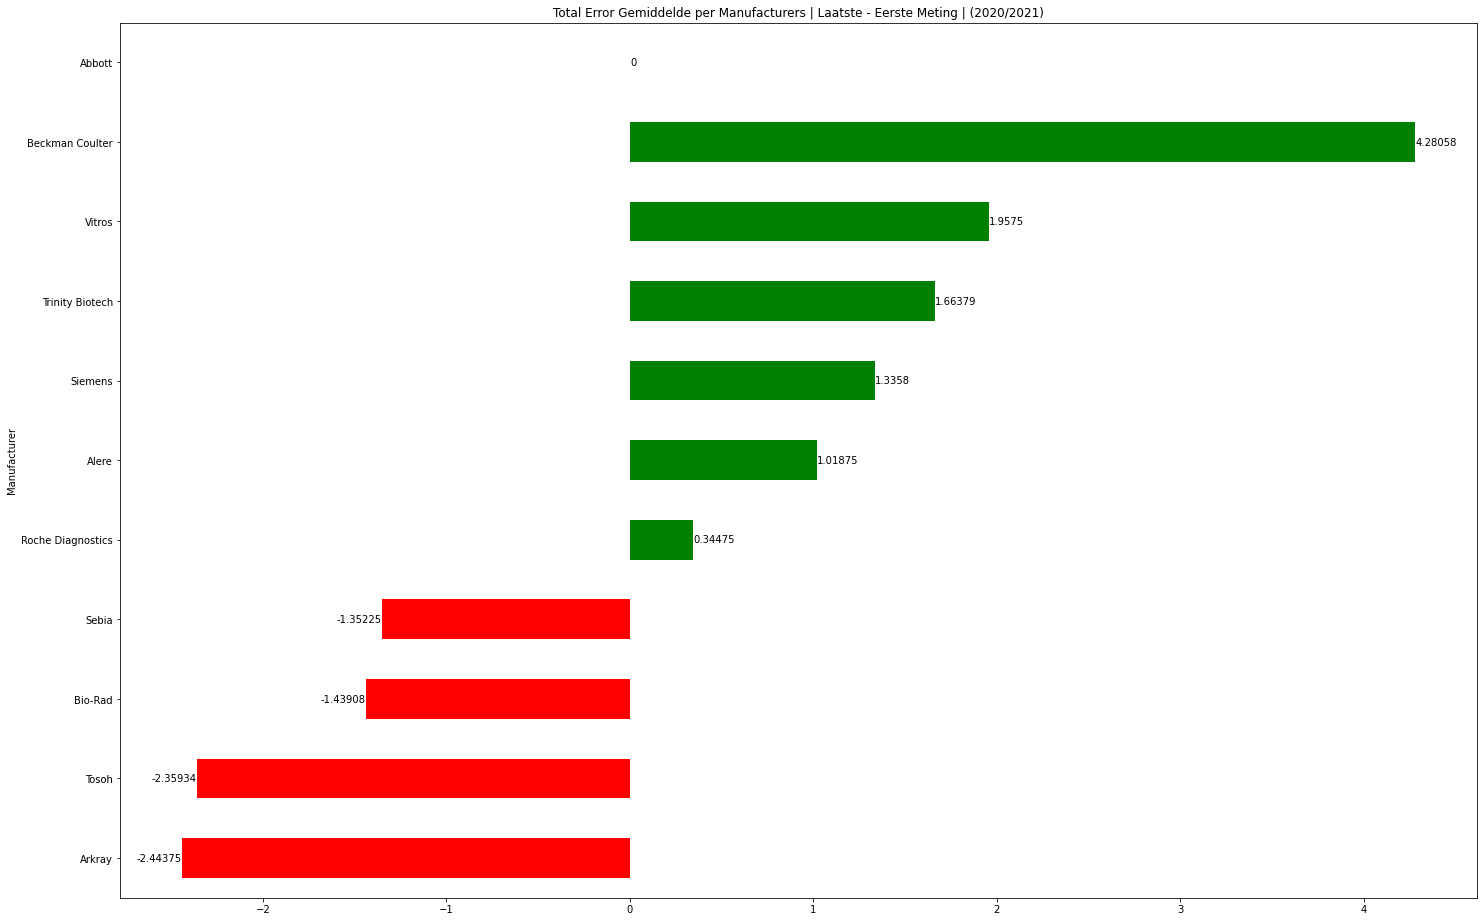

In [23]:
from msilib.schema import Patch

#Verschil tussen de laatste sample gemiddelde en de eerste sample gemiddelde per Manufacturer van 2020 en 2021
barplot = finish.plot.barh(
    x='Manufacturer',
    y='Total Error',
    title='Total Error Gemiddelde per Manufacturers | Laatste - Eerste Meting | (2020/2021)',
    xlabel='Manufacturer',
    ylabel='Total Error',
    color=['red', 'red', 'red', 'red', 'green', 'green', 'green', 'green', 'green', 'green'],
    # legend=([
    #             Patch(facecolor='green'['Positieve Trend']),
    #             Patch(facecolor='red'['Negatieve Trend'])
    #         ], ['Positieve Trend', 'Negatieve Trend']
    #         )
    )
barplot.bar_label(barplot.containers[0])
plt.tight_layout()
plt.gcf().set_size_inches(30, 15)

### Conclusie
In de grafiek hierboven is een overzicht over het gemiddelde van de total error van het jaar 2020 eerste sample en 2021 tweede sample. Het resultaat is als je die twee waardes van elkaar af doet. Gezien de resultaten van de grafiek zijn er zes merken die vooruitgang boeken over het jaar en vier merken die achteruitgaan. Ook is er een merk die gelijk is gebleven blijkbaar.

De business value is als volgt: Een inzicht doormiddel van een grafiek en het Verschil tussen de laatste sample gemiddelde en de eerste sample gemiddelde per Manufacturer van 2020 en 2021. Als je kijkt naar de grafiek is deze business value zeker gehaald omdat je in een oog opslag weet welk merk het goed doet en welke niet.

### Advies
1. Maak gebruik van de adviezen die winst maken. Zo weet je dat een merk de goede kant op aan het gaan is en ze zitten in een goede flow. Een gevaar is wel dat zo'n groei ook tijdelijk kan zijn en dat ze in 2023 weer naar beneden gaan.
2. Maak gebruik van het merk die 0 vooruitgang heeft. Dit merk is heel consistent en met consistentie kan je gedurende een lange periode goede resultaten halen. Maar ook met dit merk kan er altijd veranderingen komen het jaar daarna, het is niet slim om op eentje te gokken.
3. Blijf gebruik maken van alle merken omdat de stijging en/of daling niks zegt over de waardes van het merk. Misschien zit er in het merk met de diepste daling wel de laagste waardes en dat blijft leidend. Dus blijf alle merken volgen en zie naar de laagste total error waarde.